# Career Day Spring 2020 - Student Registration

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# data dir
data_dir = '/Users/andrew_boles/Documents/Jupyter Files/data/'

In [4]:
# import csvs as dfs
df_sub = pd.read_csv(data_dir + 'attendee_download20200108_SUB.csv')
df_foster = pd.read_csv(data_dir + 'attendee_download20200108_Foster.csv')
df_cashion = pd.read_csv(data_dir + 'attendee_download20200108_Cashion.csv')
# looks like we need to change the Majors column for each
for index,row in df_sub.iterrows():
    row['Majors'] = row['Majors'].split('\"')[1]
for index,row in df_foster.iterrows():
    row['Majors'] = row['Majors'].split('\"')[1]
for index,row in df_cashion.iterrows():
    row['Majors'] = row['Majors'].split('\"')[1]
# now we need to combine them into one; but first add in a unique identifier column
df_sub['Location'] = 'SUB'
df_foster['Location'] = 'Foster'
df_cashion['Location'] = 'Cashion'
df_combo = df_sub.append(df_foster,ignore_index=True)
df_combo = df_combo.append(df_cashion, ignore_index=True)

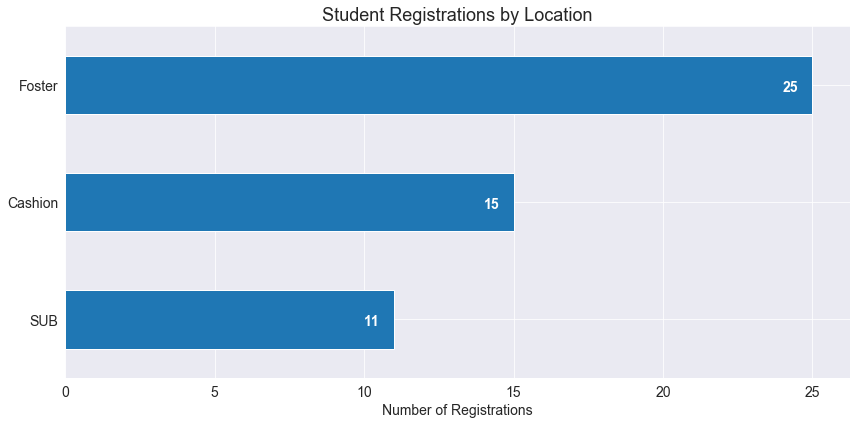

In [5]:
# bar chart with the number of registrations
plt.figure(figsize=(12,6))
ax = df_combo['Location'].value_counts().plot(kind='barh', fontsize=14)
ax.set_title('Student Registrations by Location', fontsize=18)
ax.set_xlabel('Number of Registrations', fontsize=14)
for i,v in enumerate(df_combo['Location'].value_counts()):
    ax.text(v-1, i+.05, str(v), fontsize=14, fontweight='bold', color='white')
ax.invert_yaxis()
plt.tight_layout()

In [6]:
# now need to make sure that the Registered column is datetime
df_combo['Registered'] = pd.to_datetime(df_combo['Registered'], format='%Y-%m-%d %I:%M %p')
df_reg = df_combo['Registered'].value_counts()
df_reg = df_reg.to_frame()
registered_date = []
for index,row in df_reg.iterrows():
    registered_date.append(index)
df_reg['Registered Date'] = registered_date
df_reg = df_reg.sort_values(by='Registered Date', ascending=True)
count = 0
sum = []
for index, row in df_reg.iterrows():
    count = count + row['Registered']
    sum.append(count)
df_reg['sum'] = sum

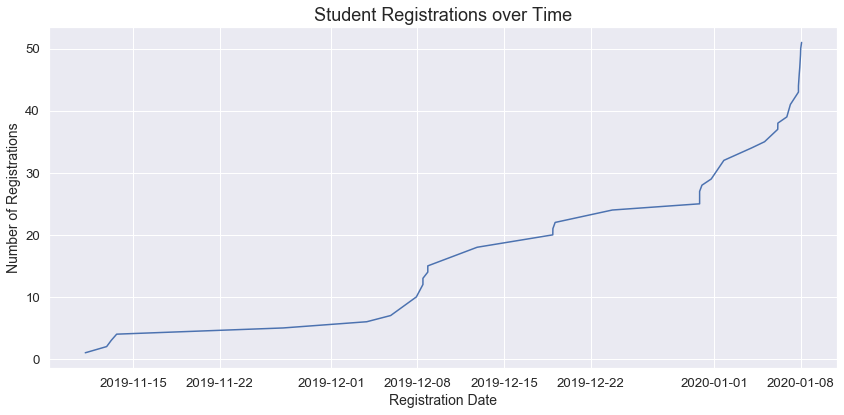

In [7]:
# plot over time
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
my_date_format = mdates.DateFormatter('%Y-%m-%d %I:%M %p')
ax = sns.lineplot(x='Registered Date',y='sum', data=df_reg)
ax.set_xlabel('Registration Date', fontsize=14)
ax.set_ylabel('Number of Registrations',fontsize=14)
ax.set_title('Student Registrations over Time',fontsize=18)
plt.tight_layout()

## Number of Students Registered by College:

In [8]:
print(df_combo['College'].value_counts().to_string())

Hankamer School of Business                   18
College of Arts and Sciences                  18
Robbins College of Health & Human Sciences     5
School of Engineering and Computer Science     4
Graduate School                                3
Seminary                                       3


## Number of Students Registered by School Year:

In [9]:
print(df_combo['School Year'].value_counts().to_string())

Senior       27
Junior       10
Masters       6
Sophomore     6
Freshman      2


## Number of Students Registered by Primary Major:

In [10]:
print(df_combo['Majors'].value_counts().to_string())

Biology                          6
Finance                          6
Economics                        3
Theology                         3
Political Science                3
Mechanical Engineering           3
Public Health                    3
Business Administration          3
Psychology                       3
Health Science Studies           2
Undecided                        2
Pre-neuroscience                 2
Pre-Business                     2
Supply Chain Management          2
Marketing                        1
Computer Science                 1
Real Estate                      1
Risk Management And Insurance    1
Professional Selling             1
Journalism                       1
Accounting                       1
Pre-Psychology                   1
